0.9295637290675222
0.9729650960803103


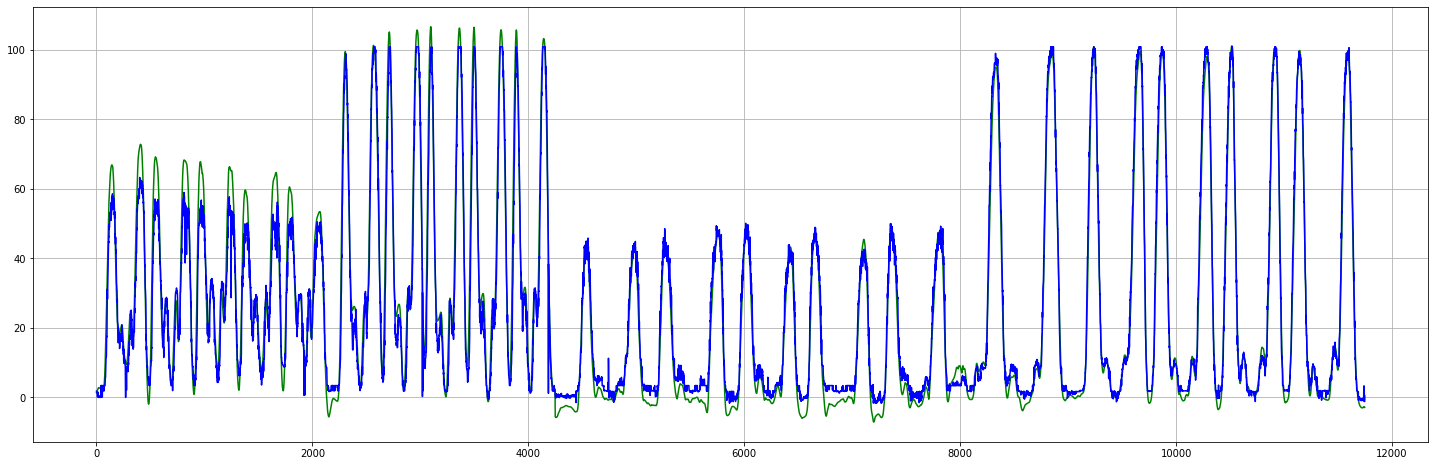

In [25]:
import json
import pickle
import sklearn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
json_path = '../courbe/json/Sujet'
xsens_path = '../Xsens_profil.p'
n = ['1','5','6','9','10','12','13','7','14','15','18','21','22']
def load_json(i):
    file_path =json_path+i+'_1p_success.json' 
    with open(file_path , 'rb') as fl:
        data = json.load(fl)
    return data
def pickle_data(i,angleName):
    with open(xsens_path, 'rb') as f:
        xsens_data = pickle.load(f)
    xs = xsens_data['Sujet'+i+'_T1']
    l = xs[angleName].tolist()
    return l
def get_angle(angleName,dict_):
    data = dict_['frames']
    angles = []
    for key,values in data.items():
        angles.append(values['angles'][angleName])
    return angles

#données d'entrainement 
def recup_data(n,angleName):
    datas = []
    data_xsens = []
    for i in n:
        d = load_json(i)
        datas.append(get_angle(angleName,d))
        data_xsens.append(pickle_data(i,angleName))
    datas = sum(datas , [])
    data_xsens = sum(data_xsens,[])
    input_ = np.array(datas)
    output_ = np.array(data_xsens)
    return input_,output_
input_,output_ = recup_data(n,'Ft')
#lissage par Savitzky-Golay ou savgol
np.set_printoptions(precision=2)
input_ = savgol_filter(input_, 7, 2, mode='nearest')
input_ = input_.reshape(-1,1)
#input_ ,output_= make_regression(n_features = 1, n_samples=len(input_) ,random_state=1) #return input: ndarray of shape(n_samples,n_fetures)
                                                                                        #        output:ndarray of shape(n_samples)
input_train, input_test, output_train, output_test = train_test_split(input_, output_,test_size=0.01,random_state=1)
regr = MLPRegressor(hidden_layer_sizes=(5,18,20,10,20,18,5,3),random_state=1, max_iter=len(input_train)).fit(input_train, output_train)
output_pred = regr.predict(input_test)
score_train = regr.score(input_test, output_test)
print(score_train)
n_test = ['4','11']
X,y = recup_data(n_test,'Ft')
#X,y= make_regression(n_features = 1, n_samples=len(X) ,random_state=1)

X = X.reshape(-1,1)
y_pred = regr.predict(X)
score_ = regr.score(X, y)
print(score_)

fig , ax = plt.subplots(nrows=1, figsize=(25, 8))
ax.plot(range(len(y)),y,color = 'green')
ax.plot(range(len(y_pred)),y_pred,color = 'blue')
ax.grid()    
plt.show()

#save model 
filename = 'model.pkl'
pickle.dump(regr, open(filename, 'wb'))
    


les fonctions:
    ***load_json:génère les fichier json contenant les analyses faites par LEA
    ***pickle_data : charge une dictionnaire contenant les anlyses Xsens => echelle de données auxquelles on doit corriger les données de LEA
        paramètres : i==> le numéro du sujet
                     angleName==> le nom de l'angle à corriger pour chaque sujet à chaque frame
    ***recup_data : retourne sous forme de matrice 1D les angles pour chaque frame de LEA et de Xsens
                    n ==> liste des numeros de sujet
                    angleName ==> le nom de l'angle en auestion
    ***get_angle : récupère les angles dans chaque frame du sujet
train_test_split(input_, output_,test_size=0.01,random_state=1): divise les données en données d'entrainnement et données de test, test-size ==> proportion des données de test
regr = MLPRegressor(hidden_layer_sizes=(5,8,10,12,12,5,3),random_state=1,max_iter=len(input_train)).fit(input_train, output_train) : initialise le réseau de neurone à utiliser , avec des couches cachées au nombre de 7
                fit() : entraine le réseau avec ses paramàtres
input_ = savgol_filter(input_, 7, 2, mode='nearest'): éffectue un lissage de données